In [ ]:
!pip install xgboost scikit-learn

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb

In [ ]:
# Load data
df = pd.read_csv("/content/Augmentedon3.csv")  # update path if needed

# Features and target
X = df.drop("Healthy", axis=1).values
y = df["Healthy"].values

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the XGBoost model
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = xgb_model.predict(X_test)
print("Plain XGBoost Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Plain XGBoost Accuracy: 0.8636363636363636
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        12
           1       1.00      0.70      0.82        10

    accuracy                           0.86        22
   macro avg       0.90      0.85      0.86        22
weighted avg       0.89      0.86      0.86        22



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:57:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


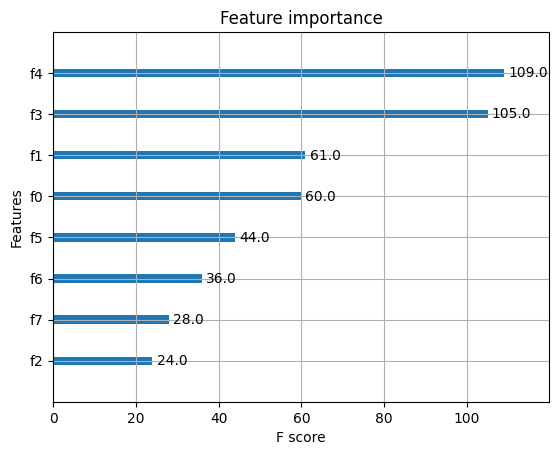

In [ ]:
import matplotlib.pyplot as plt
xgb.plot_importance(xgb_model)
plt.show()


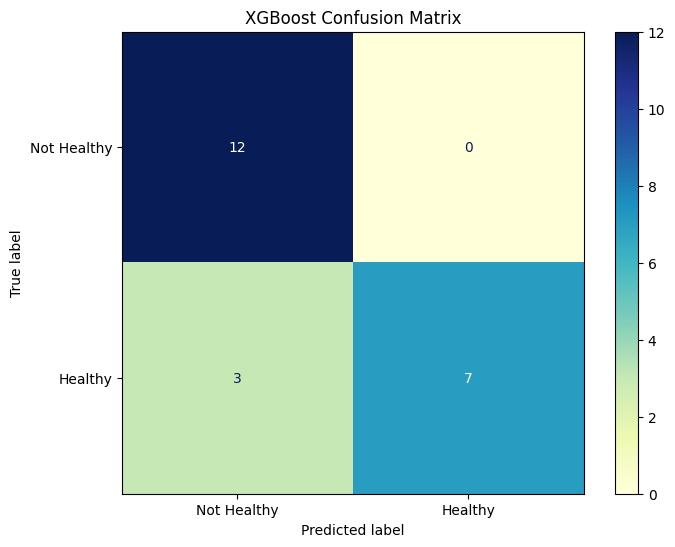


Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        12
           1       1.00      0.70      0.82        10

    accuracy                           0.86        22
   macro avg       0.90      0.85      0.86        22
weighted avg       0.89      0.86      0.86        22



In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax, cmap="YlGnBu", colorbar=True, values_format="d")
plt.grid(False)  # Αφαίρεσε το grid για καλύτερη ευκρίνεια
plt.title("XGBoost Confusion Matrix")
plt.show()

# Εκτύπωση επιπλέον μετρικών
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

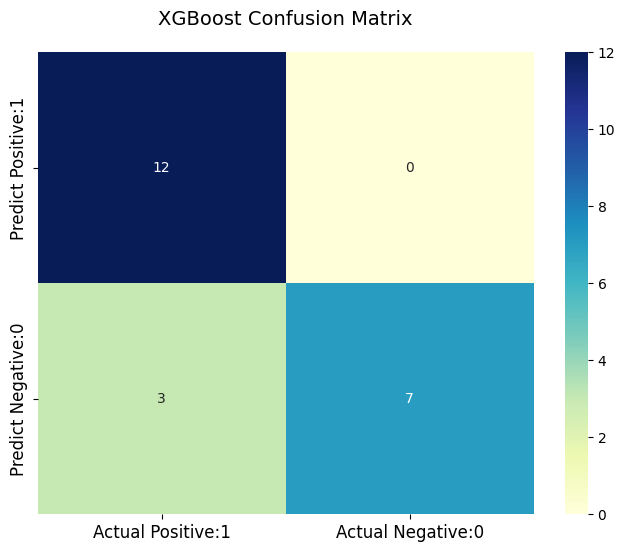

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np

# Υποθέτουμε πως έχουμε y_test και y_pred από προηγούμενο βήμα
cm = confusion_matrix(y_test, y_pred)

# Δημιουργία DataFrame με τις ετικέτες όπως τις θέλεις
cm_matrix = pd.DataFrame(
    data=cm,
    columns=['Actual Positive:1', 'Actual Negative:0'],  # Στήλες = Πραγματικές Τιμές
    index=['Predict Positive:1', 'Predict Negative:0']   # Γραμμές = Προβλεπόμενες Τιμές
)

# Σχεδίαση heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu', cbar=True)
plt.title('XGBoost Confusion Matrix', fontsize=14, pad=20)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=90, fontsize=12)
plt.show()